# Simple AutoEncoder

In [13]:
from keras.layers import Input, Dense
from keras.models import Model

In [14]:
encoding_dim = 256 #input dimension

In [15]:
'''Here we adding same number of input and output nodes.
   By shaping input and output'''

input_img = Input(shape=(784,)) #object of shaping 784

encoded = Dense(encoding_dim, activation='relu')(input_img) #for representation
decoded = Dense(784, activation='sigmoid')(encoded) #for reconstruction

In [16]:
autoencoder = Model(input_img, decoded) #maps input to reconstruction

In [17]:
encoder = Model(input_img, encoded) #emcoder

In [18]:
encoded_input = Input(shape=(encoding_dim,)) #shaping to 32 dimensional input

In [19]:
decoder_layer = autoencoder.layers[-1]

In [20]:
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [21]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [22]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

In [23]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [24]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.3261 - val_loss: 0.2569
Epoch 2/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.2404 - val_loss: 0.2220
Epoch 3/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.2106 - val_loss: 0.1980
Epoch 4/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.1912 - val_loss: 0.1824
Epoch 5/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1779 - val_loss: 0.1709
Epoch 6/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.1676 - val_loss: 0.1617
Epoch 7/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1593 - val_loss: 0.1541
Epoch 8/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1523 - val_loss: 0.1477
Epoch 9/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.1463 - val_loss: 0.1422
Epoch

In [25]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

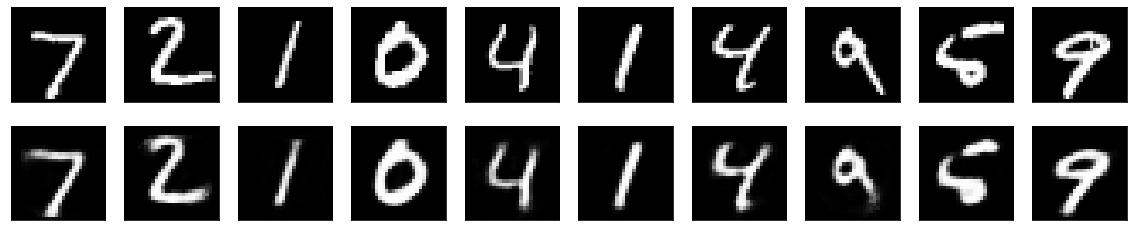

In [27]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [28]:
from keras import regularizers

In [29]:
encoding_dim = 256

In [30]:
input_img = Input(shape=(784,))

In [31]:
encoded = Dense(encoding_dim, 
                activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)

In [32]:
decoded = Dense(784, activation='sigmoid')(encoded)

In [33]:
autoencoder = Model(input_img, decoded)

In [34]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [35]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.6883 - val_loss: 0.6487
Epoch 2/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.6285 - val_loss: 0.6091
Epoch 3/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.5917 - val_loss: 0.5750
Epoch 4/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.5599 - val_loss: 0.5454
Epoch 5/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.5324 - val_loss: 0.5198
Epoch 6/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.4531 - val_loss: 0.4458
Epoch

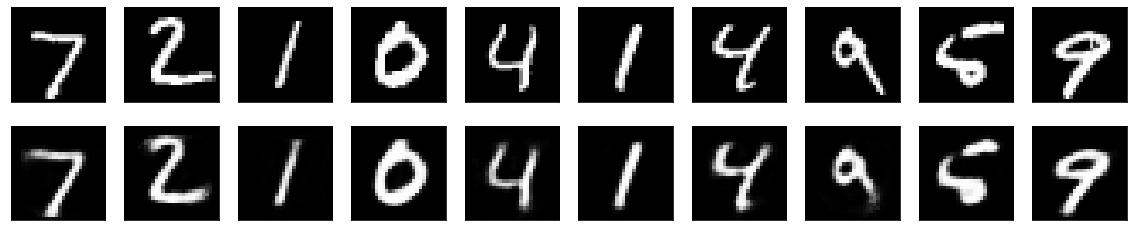

In [36]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()